In [2]:
# Wireless Sensor Network
# Author: Han Chen
# Plot library: matplotlib, networkx
import networkx as nx
from matplotlib import pyplot as plt
import random as rd
import math
import copy
import time
%matplotlib inline

In [311]:
n=4000
deg = 120

print math.sqrt(deg/float(n))

0.173205080757


In [31]:
# Unit Square

# record the time for a benchmark

start = time.time()

# parameter
n = 4000
th = 0.1753

# generate vertices for RGG in Square
v={}  # vertices

for i in range(1,n+1):
    v[i]=(rd.random(),rd.random())


# convert RGG into adjacency lists
adj={}
for i in range(1,n+1):
    adj[i]=[]
    
# sort according to x-coordinate
v_sorted=sorted(v,key=lambda i:v[i][0])

# Record edges while transformation
edges=[]

# plane sweep to find adjacenct vertices
for i in range(1,n+1):
    key = v_sorted[i-1]
    for j in range (i+1,n+1):
        temp = v_sorted[j-1]
        if(v[temp][0]-v[key][0]>th): 
            break
        dis = (v[temp][0]-v[key][0])**2+(v[temp][1]-v[key][1])**2
        if(dis<=th**2):
            adj[key].append(temp)
            adj[temp].append(key)
            edges.append((key,temp))
            
print 'Number of edges: ', len(edges)

Number of edges:  656709


In [40]:
# Disk, with radius 1

# parameter
n = 4000
th = 0.1753
print 'Estimated Threshold: ', th

# generate vertices for RGG in unit square
v={}  # vertices

for i in range(1,n+1):
    x = (rd.random()-0.5)*2 # find x coordinate
    y = (rd.random()-0.5)*2 # find y coordinate
    d = math.sqrt(x*x+y*y)
    if d>1:
        x=1/d*x*rd.random()
        y=1/d*y*rd.random()
    v[i]=(x,y)


# convert RGG into adjacency lists
adj={}
for i in range(1,n+1):
    adj[i]=[]
    
# sort according to x-coordinate
v_sorted=sorted(v,key=lambda i:v[i][0])

# Record edges while transformation
edges=[]

# plane sweep to find adjacenct vertices
for i in range(1,n+1):
    key = v_sorted[i-1]
    for j in range (i+1,n+1):
        temp = v_sorted[j-1]
        if(v[temp][0]-v[key][0]>th): 
            break
        dis = (v[temp][0]-v[key][0])**2+(v[temp][1]-v[key][1])**2
        if(dis<=th**2):
            adj[key].append(temp)
            adj[temp].append(key)
            edges.append((key,temp))
            
print 'Number of edges: ', len(edges)


Estimated Threshold:  0.1753
Number of edges:  238738


Max Degree:  172
Min Degree:  34
Average Degree:  119


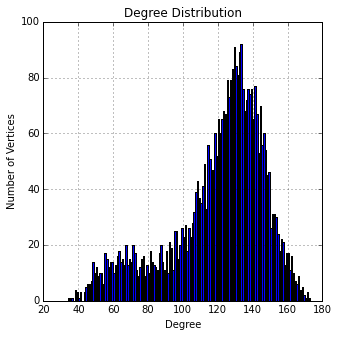

In [41]:
# bucket sort vertices by degrees

# buckets dict
# key: degree, value: vertices
adj_sorted={} 

# average degree
avg_deg= 0

# bucket sort
for i in adj:
    temp = len(adj[i])
    if adj_sorted.has_key(temp) is False:
        adj_sorted[temp]=[]
    adj_sorted[len(adj[i])].append(i)
    avg_deg += len(adj[i])

# vertices ordered by degree
degree=[]    
for i in adj_sorted:
    for j in adj_sorted[i]:
        degree.append(j)

# print max, min, avg degree
max_deg = len(adj[degree[n-1]])
min_deg = len(adj[degree[0]])
print 'Max Degree: ', max_deg
print 'Min Degree: ', min_deg
print 'Average Degree: ', avg_deg/n

# plot degree figure
# x: degree, y: number of vertices
x=[i for i in adj_sorted.keys()]
y=[len(adj_sorted[i]) for i in adj_sorted.keys()]


fig = plt.figure(figsize=(5,5))
plt.ylabel('Number of Vertices')
plt.xlabel('Degree')
plt.title('Degree Distribution')
plt.bar(x,y)
plt.grid('on')


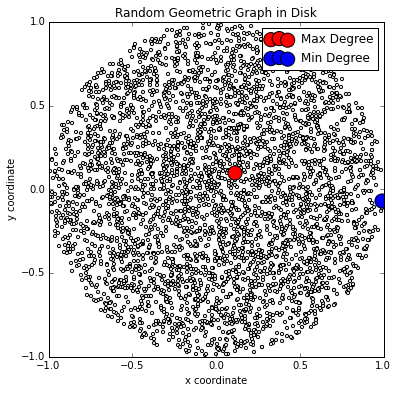

In [42]:
# plot the graph in networkx
g = nx.Graph()

# add nodes and edges
g.add_nodes_from(v.keys())
#g.add_edges_from(edges)
    
# vertex with max degree and min degree
max_vertex = degree[n-1]
min_vertex = degree[0]

# select their edges
max_edges = []
for i in adj[max_vertex]:
    max_edges.append((max_vertex,i))
    
min_edges = []
for i in adj[min_vertex]:
    min_edges.append((min_vertex,i))


plt.figure(figsize=(6,6))


# draw the graph

# node size
node_size = 10

# edge width
width = 0.1

nx.draw_networkx_nodes(g,v,node_color='w',node_size=node_size,width=width, edge_color='k')

# denote the vertex with max degree with red color
nx.draw_networkx_nodes(g,v,nodelist=[max_vertex],node_color='r',node_size=20*node_size,edgelist=max_edges,
        width=width*2,edge_color='r',label='Max Degree')

# denote the vertex with min degree with blue color
nx.draw_networkx_nodes(g,v,nodelist=[min_vertex],node_color='b',node_size=20*node_size,edgelist=min_edges,
        width=width*2,edge_color='b',label='Min Degree')
plt.axis([-1,1,-1,1])
plt.axis('on')
plt.title('Random Geometric Graph in Disk')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.legend()

In [43]:
# smallest-last ordering 
# input: adj_sorted(sorted adjacency lists by degree)
# output: 1. smallest last ordered vertices list
# output: 2. list of degree for each vertex when removed from graph

# input
adj_sl = copy.deepcopy(adj)

# vertices after smallest last ordering
sl_v=[]
# degrees when a vertex deleted, vertices ordered by sl
sl_deg=[]

# Max min-degree when deleted
for a in range(1,n+1):
    for i in adj_sorted: 
        if(len(adj_sorted[i])!=0):           # find the vertex with smallest degree
            j = adj_sorted[i][0]      
            sl_v.insert(0,j)                 # insert that vertex to the head of sl list 
            sl_deg.insert(0,len(adj_sl[j]))  # record its degree when deleted
            for k in adj_sl[j]:              # for each neighbor(vertex in its adj_list)
                d = len(adj_sl[k])           # find its degree
                adj_sl[k].remove(j)          # remove that vertex from its neighbors adj_list
                adj_sorted[d].remove(k)      # decrement its degree by 1
                if adj_sorted.has_key(d-1) is False:
                    adj_sorted[d-1]=[]
                adj_sorted[d-1].append(k)              
            adj_sorted[i].remove(j)          # remove that node from sorted adj     
            break
            
print 'Max min-degree when deleted: ', max(sl_deg)

Max min-degree when deleted:  71


Terminal Clique Size:  58


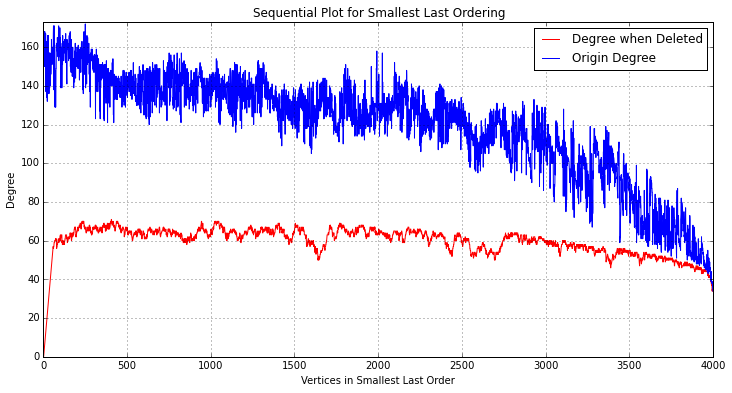

In [44]:
# sequential plot in smallest last order
# 1. degree when deleted
# 2. origin degree

x = [i for i in range(1,n+1)]
y1 = sl_deg                         # degree when deleted
y2 = [len(adj[i]) for i in sl_v]    # origin degree

plt.figure(figsize=(12,6))
plt.axis([0,n+1,0,max_deg+1])
plt.plot(x,y1,'r',label='Degree when Deleted')
plt.plot(x,y2,'b',label='Origin Degree')
plt.title('Sequential Plot for Smallest Last Ordering')
plt.xlabel('Vertices in Smallest Last Order')
plt.ylabel('Degree')
plt.legend()
plt.grid('on')

# also find the terminal clique size
clique_size = 1
for i in range(1,n):
    if(sl_deg[i]>sl_deg[i-1]):
        clique_size+=1
    else:
        break
        
print 'Terminal Clique Size: ', clique_size

Number of Colors:  58
Size of Max Color Class:  92


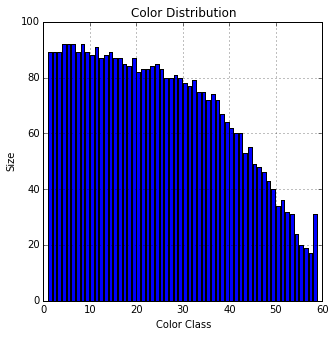

In [45]:
# graph coloring 
# color vertices in the graph in smallest last order

# input: adjacency list
adj=adj
# input: smallest last order
sl_v = sl_v
# parameter
color_num = clique_size
# output:
color={}

# initialize color clasee
for i in range(1,color_num+1):
    color[i]=[]
#
color_init = [0]*(n+1)

# color the graph
for i in sl_v:
    avail = [True]*(color_num+1)                # available color from 0 to num_color
    for j in adj[i]:                            # remove those no longer available
        avail[color_init[j]]=False
    k = 0
    for k in range(1,color_num+1):
        if avail[k]:
            break
    color[k].append(i)
    color_init[i]=k  


# find the size of max color class
max_color_size=0
for i in color:
    temp =  len(color[i])
    if temp>max_color_size:
        max_color_size= temp

print 'Number of Colors: ', len(color)
print 'Size of Max Color Class: ', max_color_size
    
# plot color distribution
x = [i for i in color]
y = [len(color[i]) for i in color]

plt.figure(figsize=(5,5))
plt.bar(x,y)
plt.title('Color Distribution')
plt.xlabel('Color Class')
plt.ylabel('Size')
plt.grid('on')

In [46]:
# Backbone bipartite 
# from two of the first 4 class


# source color classes
c1 = 1
c2 = 2




## find edges in largest component in bipartite backbone
## using breadth first search
def bfsBB(bbis1,bbis2,adj):
    ## record vertices in both independent sets
    bb = [0]*(len(adj)+1)
    for i in bbis1+bbis2:
        bb[i]=1
    ## find vertex with most connections in these two indpendent sets
    root = 0
    root_deg = -1
    for i in bbis1+bbis2:
        cnt = 0
        for j in adj[i]:
            cnt += bb[j]
        if cnt>root_deg:
            root_deg = cnt
            root = i
    ## bfs to find edges in this component starting with root
    backbone={}
    backbone[0]=[] #initialize backbone vertices
    backbone[1]=[] #initialize backbone edges
    q = []
    q.append(root)
    backbone[0].append(root)
    bb[root]=0
    while len(q) is not 0:
        temp = len(q)
        for i in range(0,temp):
            vet = q.pop(0)
            for j in adj[vet]:
                if bb[j]==1:
                    q.append(j)
                    bb[j]=0
                    backbone[0].append(j)
                    backbone[1].append((vet,j))
    ##
    return backbone


# find the two largest components from 6 possible bipratite subgraph
backbone12 = bfsBB(color[1],color[2],adj)
backbone13 = bfsBB(color[1],color[3],adj)
backbone14 = bfsBB(color[1],color[4],adj)
backbone23 = bfsBB(color[2],color[3],adj)
backbone24 = bfsBB(color[2],color[4],adj)
backbone34 = bfsBB(color[3],color[4],adj)


print 'Largest Components of Color 1 and 2: ', len(backbone12[1]), len(backbone12[0])
print 'Largest Components of Color 1 and 3: ', len(backbone13[1]), len(backbone13[0])
print 'Largest Components of Color 1 and 4: ', len(backbone14[1]), len(backbone14[0])
print 'Largest Components of Color 2 and 3: ', len(backbone23[1]), len(backbone23[0])
print 'Largest Components of Color 2 and 4: ', len(backbone24[1]), len(backbone24[0])
print 'Largest Components of Color 3 and 4: ', len(backbone34[1]), len(backbone34[0])



Largest Components of Color 1 and 2:  173 174
Largest Components of Color 1 and 3:  177 178
Largest Components of Color 1 and 4:  180 181
Largest Components of Color 2 and 3:  175 176
Largest Components of Color 2 and 4:  178 179
Largest Components of Color 3 and 4:  178 179


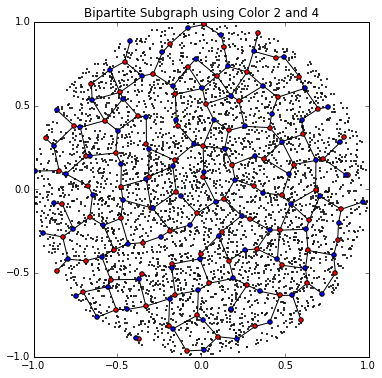

In [49]:
# plot the selected bipartite subgraph and backbone

c1 = 2
c2 = 4

## bipartite independent set 1
bbis1 = color[c1]
## bipartite independent set 2
bbis2 = color[c2]

# vertices in backbone
nodelist = bbis1+bbis2
# edges in backbone
edgelist = []

bb = [0]*(n+1)
for i in bbis2:
    bb[i]=1
for i in bbis1:
    for j in adj[i]:
        if bb[j]==1:
            edgelist.append((i,j))
            
# labels
label1 = 'Backbone Vertices from Color %d' %c1
label2 = 'Backbone Vertices from Color %d' %c2

# plot
plt.figure(figsize=(6,6))

nx.draw_networkx_nodes(g,v,node_size=1,node_color='w',width=0.1,label='Other Vertices')
nx.draw_networkx_nodes(g,v,nodelist=bbis1, node_size=20, node_color='r',label=label1)
nx.draw_networkx_nodes(g,v,nodelist=bbis2, node_size=20, node_color='b',label=label2)
nx.draw_networkx_edges(g,v,edgelist=edgelist,edge_color='k',width=1.0)
plt.axis('on')
plt.axis([-1,1,-1,1])
#lt.legend(bbox_to_anchor=(1.7,1))
plt.title('Bipartite Subgraph using Color {0:1d} and {1:1d}'.format(c1,c2))



Dominant Percentage:  0.999


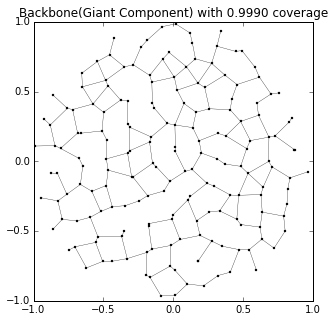

In [50]:
# Determine the dominant ratio of this backbone

bb_bbis1= [] # vertices in the backbone from color 1
bb_bbis2= [] # vertices in the backbone from color 2

# backbone source (argument)
############################
backbone = backbone24 #

for i in backbone[0]:
    for j in bbis1:
        if i==j:
            bb_bbis1.append(j)
    for k in bbis2:
        if i==k:
            bb_bbis2.append(k)
            
# edges in backbone
edgelist = []

bb_edge = [0]*(n+1)
for i in bb_bbis2:
    bb_edge[i]=1
for i in bb_bbis1:
    for j in adj[i]:
        if bb[j]==1:
            edgelist.append((i,j))

# determine coverage
covered_v =[0]*(n+1)
for i in backbone[0]:
    for j in adj[i]:
        covered_v[j]=1

domin_per = sum(covered_v)/float(n)

print 'Dominant Percentage: ', domin_per
            
# plot
plt.figure(figsize=(5,5))

nx.draw_networkx_nodes(g,v,nodelist=bb_bbis1+bb_bbis2, node_size=2, node_color='k')
nx.draw_networkx_edges(g,v,edgelist=edgelist,edge_color='k',width=0.3)
plt.axis('on')
plt.axis([-1,1,-1,1])
plt.legend(bbox_to_anchor=(1.8,1))
plt.title('Backbone(Giant Component) with {0:1.4f} coverage'.format(domin_per))

### totoal time to process one benchmark graph
end = time.time()
print 'Total Time: ', end-start